In [14]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits

digits = datasets.load_digits()

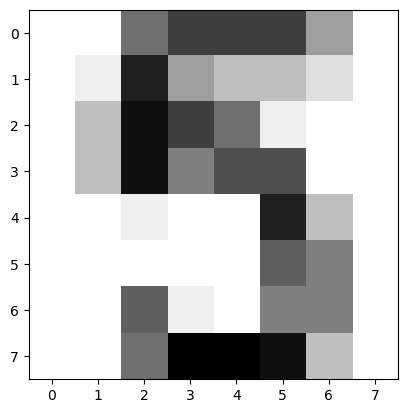

In [15]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [17]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train,  y_train)

#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

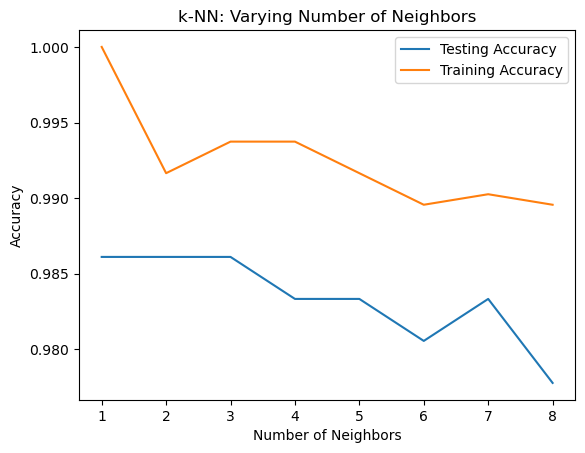

In [18]:
#Setup arrays to store train and test accuracies
neighbors =  np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k

for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuacy on the testing set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuacy on the training set
    test_accuracy[i] = knn.score(X_test, y_test)
    
#Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
!pip install torch

In [22]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import variable

In [24]:
!pip install torchvision

     ---------------------------------------- 1.2/1.2 MB 1.5 MB/s eta 0:00:00


In [25]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

100%|██████████| 9912422/9912422 [00:06<00:00, 1493800.13it/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28903768.51it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1836942.84it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [26]:
print("Number of training example", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training example torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x17037AF8C40>, 5)


C:\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


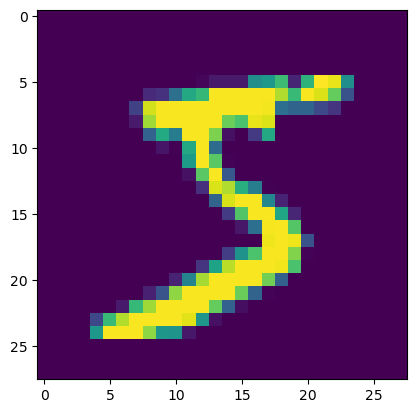

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [39]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [40]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))
            
    return net

In [41]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.359036684036255
Epoch = 0.000000. Batch = 100. Loss = 0.8158131241798401
Epoch = 0.000000. Batch = 200. Loss = 0.6744622588157654
Epoch = 0.000000. Batch = 300. Loss = 0.6809446215629578
Epoch = 0.000000. Batch = 400. Loss = 0.4705858826637268
Epoch = 0.000000. Batch = 500. Loss = 0.551677405834198
Epoch = 0.000000. Batch = 600. Loss = 0.23497943580150604
Epoch = 0.000000. Batch = 700. Loss = 0.37437042593955994
Epoch = 0.000000. Batch = 800. Loss = 0.32086634635925293
Epoch = 0.000000. Batch = 900. Loss = 0.46935322880744934
Epoch = 1.000000. Batch = 0. Loss = 0.2193935215473175
Epoch = 1.000000. Batch = 100. Loss = 0.5654202103614807
Epoch = 1.000000. Batch = 200. Loss = 0.4545310139656067
Epoch = 1.000000. Batch = 300. Loss = 0.24608594179153442
Epoch = 1.000000. Batch = 400. Loss = 0.37739771604537964
Epoch = 1.000000. Batch = 500. Loss = 0.38584208488464355
Epoch = 1.000000. Batch = 600. Loss = 0.21674884855747223
Epoch = 1.000000. Batch = 700

In [42]:
net.eval()
test_loss = 0
correct=0
total=0

for data, target in test_loader:
    total+= len(target)
    output=net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9224
Percentage accuracy 92.24


In [43]:
# LINEAR REGRESSION

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('gapminder.csv')

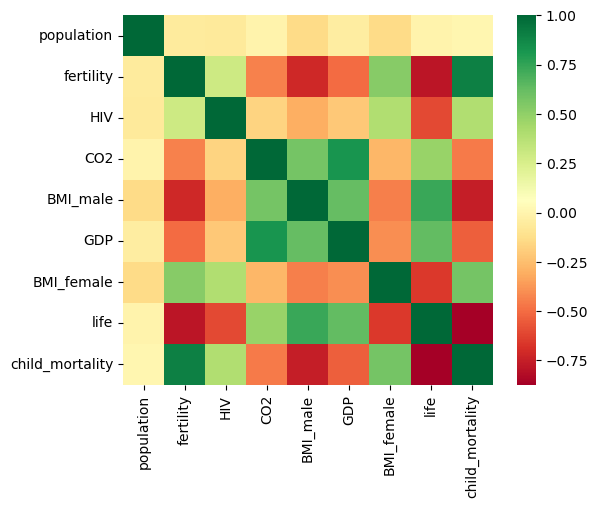

In [45]:
ax=sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

0.6162438752151917


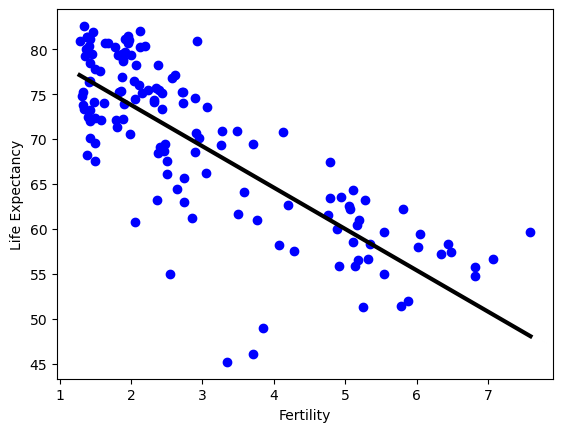

In [46]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)

x_train, x_test, y_train, y_test= train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)

reg=LinearRegression()

reg.fit(x_train, y_train)
y_predict=reg.predict(prediction_space)

print(reg.score(x_fertility, y_life))

plt.scatter(x_fertility, y_life, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()




In [47]:
features = pd.read_csv('gapminder.csv')
df=pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

x_train, x_test, y_train, y_test= train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)

print(reg_all.score(features, y_life))

0.8914651485793137


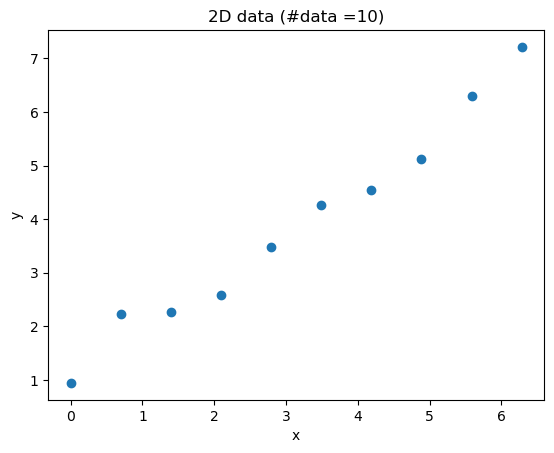

In [49]:
N=10
m= .9
c=1
x=np.linspace(0, 2*np.pi,N)
y= m*x + c+ np.random.normal(0, .3, x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data =%d)' %N)
plt.show()

In [89]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1, self.x[idx]]),
            'label': torch.tensor([self.y[idx]])
        }
        return sample

In [88]:
dataset=MyDataset(x,y)
for i in range(len(dataset)):
    sample=dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.9466], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([2.2234], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.2778], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.5913], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4802], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.2653], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.5442], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.1212], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([6.3011], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.2109], dtype=torch.float64)


In [87]:
from torch.utils.data import DataLoader

dataset=MyDataset(x,y)
batch_size=4
shuffle=True
num_workers=0
dataloader= DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)


In [86]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples:')
    pp.pprint(samples)


batch# = 0
samples:
{'feature': tensor([[1.0000, 2.0944],
        [1.0000, 2.7925],
        [1.0000, 0.6981],
        [1.0000, 1.3963]], dtype=torch.float64),
 'label': tensor([[2.5913],
        [3.4802],
        [2.2234],
        [2.2778]], dtype=torch.float64)}

batch# = 1
samples:
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 4.1888],
        [1.0000, 5.5851],
        [1.0000, 6.2832]], dtype=torch.float64),
 'label': tensor([[4.2653],
        [4.5442],
        [6.3011],
        [7.2109]], dtype=torch.float64)}

batch# = 2
samples:
{'feature': tensor([[1.0000, 0.0000],
        [1.0000, 4.8869]], dtype=torch.float64),
 'label': tensor([[0.9466],
        [5.1212]], dtype=torch.float64)}


In [59]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out=self.linear(x)
        return out

In [60]:
input_dim=2
output_dim=1

model = MyModel(input_dim, output_dim)

In [61]:
cost=nn.MSELoss()

In [90]:
num_epochs=10
l_rate=0.01
optimiser= torch.optim.SGD(model.parameters(), lr=l_rate)

dataset= MyDataset(x,y)
batch_size=4
shuffle=True
num_workers=0
training_sample_generator= DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch =%s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        optimiser.zero_grad()
        
        error.backward()
        
        optimiser.step()



Epoch =0


RuntimeError: mat1 and mat2 must have the same dtype

In [65]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


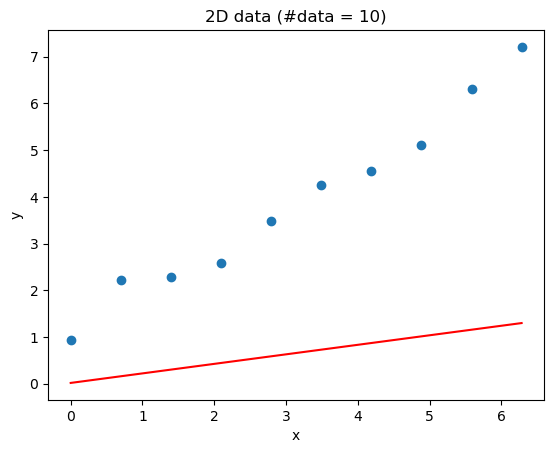

In [66]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [68]:
# RECOMMENDATION SYSTEMS

In [73]:
def user_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items =M.shape
    avg_ratings = np.nanmean(M, axis=1)
    sim_users= sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
    return pred
            
        

In [74]:
def item_cf(M, metric='cosine'):
    pred = np.copy(M)
    n_users, n_items =M.shape
    avg_ratings = np.nanmean(M, axis=0)
    sim_items= sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range(n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_items[i] * (M[:,j] - avg_ratings)) / sum(sim_items[i])
    return pred

In [82]:
def evaluateRS(M, M_result, algorithm, similarity):
    evaluateRS(M, M_result, 'user_cf', 'cosine')
    evaluateRS(M, M_result, 'user_cf', 'correlation')
    evaluateRS(M, M_result, 'item_cf', 'cosine')
    evaluateRS(M, M_result, 'item_cf', 'correlation')
  



In [79]:
results=[]
for method in ['user_cf', 'item_cf']:
    for metric in ['cosine', 'correlation']:
        rank_acc = evaluate_rank(M, M_result, method, metric)
        results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
print("\n".join(results))

NameError: name 'evaluate_rank' is not defined

In [81]:
def evaluate_rank(M, M_result, method, metric):
    results=[]
    for method in ['user_cf', 'item_cf']:
        for metric in ['cosine', 'correlation']:
            rank_acc = evaluate_rank(M, M_result, method, metric)
            results += ["Rank accuracy of {0} with {1} metric: {2}".format(method[1], metric, rank_acc)]
    print("\n".join(results))
  
